In [100]:
#Import libraries

import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier


In [101]:
#This is where I got the dataset from: https://vincentarelbundock.github.io/Rdatasets/datasets.html
#Import and check out the data


# Load data from auto.csv in the data directory

cwd = os.getcwd()
auto_file = cwd + '\\data' + '\\' + 'auto.csv'
auto_file

auto = pd.read_csv(auto_file)


#auto = pd.read_csv("auto.csv")
#auto.info()
#auto.describe()
#auto.columns

FileNotFoundError: File b'/Users/kateberman/Data-201/Project 3 Logistic Regression\\data\\auto.csv' does not exist

In [53]:
auto1 = auto.dropna()

In [54]:
#Let's see how many rows we've lost due to taking out Na values

auto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 10 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 33.7+ KB


In [55]:
#Looks like there aren't any Na values. Let's take a look at the first few rows.
auto1.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [56]:
#To build a logistic regression model, you need a predictor that is binary.  To do this, I am
#creating a new column "origin2".  Domestic cars will evaliuate to "True" and Foreign cars will evaluate to "False".

auto['origin2']=auto['origin']==1
auto.columns
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,origin2
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,True
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,True
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,True
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,True
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,True


In [57]:
#Let's start our exploratory analysis by building separate foreign and domestic lists for each prospective feature:
#mpg, cylinders, displacement, horsepower, weight, acceleration.

labels= ['domestic','foreign']

# mpg

mpg_dom = auto.loc[auto.origin2==True,['mpg']]
mpg_for = auto.loc[auto.origin2==False,['mpg']]
mpg_dom_list = mpg_dom.values.flatten()
mpg_for_list = mpg_for.values.flatten()


In [59]:
# cylinders

cyl_dom = auto.loc[auto.origin2==True,['cylinders']]
cyl_for = auto.loc[auto.origin2==False,['cylinders']]
cyl_for_list = cyl_for.values.flatten()
cyl_dom_list = cyl_dom.values.flatten()

In [60]:
# displacement 

disp_dom = auto.loc[auto.origin2==True,['displacement']]
disp_for = auto.loc[auto.origin2==False,['displacement']]
disp_for_list = disp_for.values.flatten()
disp_dom_list = disp_dom.values.flatten()


In [61]:
# horsepower 

hp_dom = auto.loc[auto.origin2==True,['horsepower']]
hp_for = auto.loc[auto.origin2==False,['horsepower']]
hp_for_list = hp_for.values.flatten()
hp_dom_list = hp_dom.values.flatten()

In [62]:
# weight

wt_dom = auto.loc[auto.origin2==True,['weight']]
wt_for = auto.loc[auto.origin2==False,['weight']]
wt_for_list = wt_for.values.flatten()
wt_dom_list = wt_dom.values.flatten()

In [63]:
# acceleration

acc_dom = auto.loc[auto.origin2==True,['acceleration']]
acc_for = auto.loc[auto.origin2==False,['acceleration']]
acc_for_list = acc_for.values.flatten()
acc_dom_list = acc_dom.values.flatten()

NameError: name 'cwd' is not defined

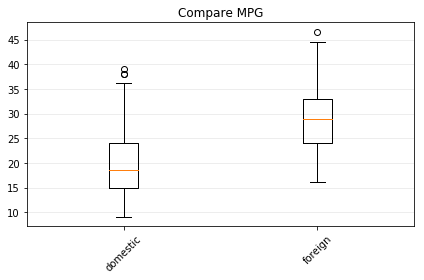

In [64]:
# Now let's make side-by-side boxplots starting with mpg 

data = [mpg_dom_list,mpg_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=10)
ax.set_title('Compare MPG')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-MPG.png'
fig.savefig(plot_file,bbox_inches='tight')


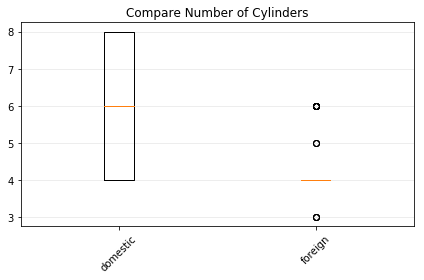

In [70]:
#Make side-by-side boxplots of cylinders

data = [cyl_dom_list,cyl_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=10)
ax.set_title('Compare Number of Cylinders')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-Cylinders.png'
fig.savefig(plot_file,bbox_inches='tight')


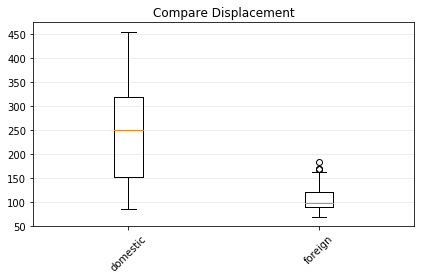

In [71]:
# Make side-by-side boxplots of displacement

data = [disp_dom_list,disp_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=10)
ax.set_title('Compare Displacement')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-Displacment.png'
fig.savefig(plot_file,bbox_inches='tight')

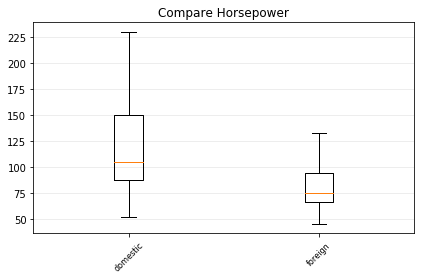

In [72]:
# Make side-by-side boxplots of horsepower 

data = [hp_dom_list,hp_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=8)
ax.set_title('Compare Horsepower')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-HP.png'
fig.savefig(plot_file,bbox_inches='tight')

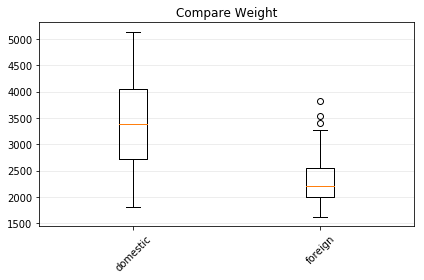

In [73]:
# Make side-by-side boxplots of weight

data = [wt_dom_list,wt_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=10)
ax.set_title('Compare Weight')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-Weight.png'
fig.savefig(plot_file,bbox_inches='tight')

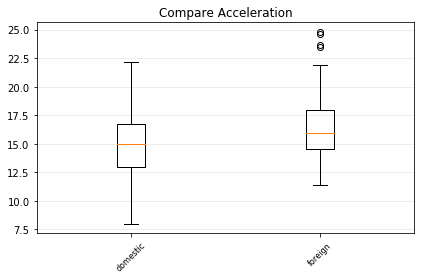

In [74]:
# Make side-by-side boxplots of acceleration 

data = [acc_dom_list,acc_for_list]

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_xticklabels(labels,rotation=45, fontsize=8)
ax.set_title('Compare Acceleration')
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'BoxPlot-Acceleration.png'
fig.savefig(plot_file,bbox_inches='tight')


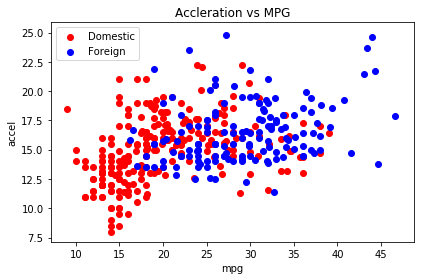

In [75]:
# Plot acceleration vs mpg (separate colors for domestic & foreign)

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(mpg_dom_list,acc_dom_list, c= 'Red', label='Domestic')
ax.scatter(mpg_for_list,acc_for_list, c= 'Blue', label='Foreign')
ax.set_title('Accleration vs MPG')
ax.set_xlabel('mpg')
ax.set_ylabel('accel')
ax.legend()
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'ScatterPlot-Accel_Vs_MPG.png'
fig.savefig(plot_file,bbox_inches='tight')

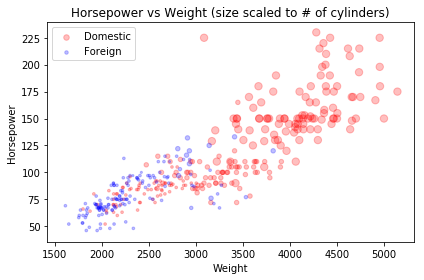

In [76]:
# Plot horsepower vs weight (separate colors for domestic & foreign)
# Scale size using number of cylinders

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(wt_dom_list,hp_dom_list, c= 'Red', label='Domestic', s=np.exp(0.5*cyl_dom), alpha=0.25)
ax.scatter(wt_for,hp_for_list, c= 'Blue', label='Foreign', s=np.exp(0.5*cyl_for),alpha=0.25)
ax.set_title('Horsepower vs Weight (size scaled to # of cylinders)')
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.legend()
fig.tight_layout()

plot_file = cwd + '\\figures' + '\\' + 'ScatterPlot-HP_Vs_Weight_Scale_Cly.png'
fig.savefig(plot_file,bbox_inches='tight')


In [77]:
# Make some models
# Assign dependent variable (y), and initialize model count

y = auto.loc[:,'origin2']

mod_count = 0

KeyError: 'the label [origin2] is not in the [columns]'

In [78]:
# Model No. 1 (mpg)

# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg"]

# Build feature vector

X = auto.loc[:,['mpg']]

# Instantiate regression object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res = {mod_count: {'name': mod_name,
           'features': features,
           'parameters': mod.coef_,
           'accuracy': accuracy_score(y, mod.predict(X))}
        }

# Show results for this model

print(res[mod_count])


NameError: name 'mod_count' is not defined

In [79]:
# Model No. 2 (mpg, displacemnt)


# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg, displacement"]

# Build feature vector

X = auto.loc[:,['mpg','displacement']]

# Instantiate regresion object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model
        
print(res[mod_count])



NameError: name 'mod_count' is not defined

In [80]:
# Model No. 3 (mpg, displacemnt, horsepower)


# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg, displacement, horsepower"]

# Build feature vector

X = auto.loc[:,['mpg','displacement','horsepower']]

# Instantiate regresion object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary res

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model

print(res[mod_count])


NameError: name 'mod_count' is not defined

In [81]:
# Model No. 4 (mpg, displacemnt, horsepower, weight)


# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg, displacement, horsepower, weight"]

# Build feature vector

X = auto.loc[:,['mpg','displacement','horsepower','weight']]

# Instantiate regresion object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model

print(res[mod_count])



NameError: name 'mod_count' is not defined

In [82]:
# Model No. 5 (mpg, displacemnt, horsepower, acceleration)


# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg, displacement, horsepower, acceleration"]

# Build feature vector

X = auto.loc[:,['mpg','displacement','horsepower','acceleration']]

# Instantiate regresion object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model

print(res[mod_count])

NameError: name 'mod_count' is not defined

In [83]:
# Model No. 6 (mpg, acceleration)


# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["mpg, acceleration"]

# Build feature vector

X = auto.loc[:,['mpg','acceleration']]

# Instantiate regresion object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model

print(res[mod_count])



NameError: name 'mod_count' is not defined

In [84]:
# Model No. 7 (horsepower, weight, cylinders)
#-------------------------------------------

# Increment counter

mod_count = mod_count+1

# Construct model name string and feature names string array

mod_name = 'Model ' + str(mod_count)
features =["horsepower, weight, cylinders"]

# Build feature vector

X = auto.loc[:,['horsepower','weight', 'cylinders']]

# Instantiate regression object and call it's fit method with X,y 

mod= LogisticRegression()
mod.fit(X,y)

# Store results in multidrectional dictionary "res"

res[mod_count]= {}
res[mod_count]['name'] = mod_name
res[mod_count]['features'] = features
res[mod_count]['parameters'] =  mod.coef_
res[mod_count]['accuracy'] = accuracy_score(y, mod.predict(X))

# Show results for this model

print(res[mod_count])

NameError: name 'mod_count' is not defined

In [85]:
# Summarize results


for i in range(1,mod_count+1) :
    print(res[i]['name'],': ')
    print('Accuracy ',res[i]['accuracy'],' ')
    print('Features ',res[i]['features'],'')
    print('Parameters ',res[i]['parameters'],'\n')
    

NameError: name 'mod_count' is not defined

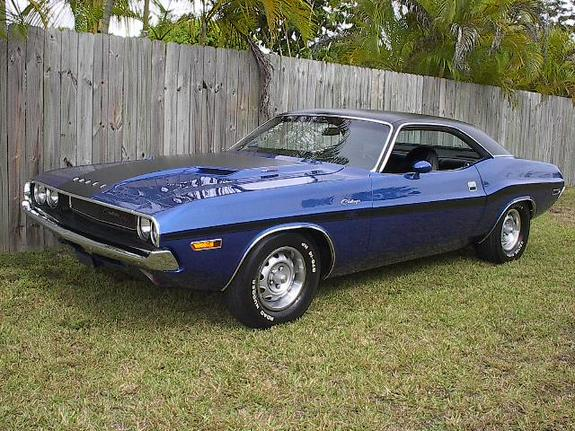

In [51]:
from IPython.display import Image
Image(filename='7588240051_large.jpg') 

In [ ]:
#Above is my sister's 1970 Dodge Challenger. Well, one that looks exactly like it.  I drove this car for one 
#glorious summer while my sister was away at school. Best summer of my life.